# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df = df[['sexo', 'posse_de_veiculo','posse_de_imovel','qtd_filhos','tipo_renda','educacao','estado_civil','tipo_residencia',
        'idade','tempo_emprego','qt_pessoas_residencia','renda']]
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14996,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14997,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,1586.85
14998,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


In [11]:
df.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,1.000000


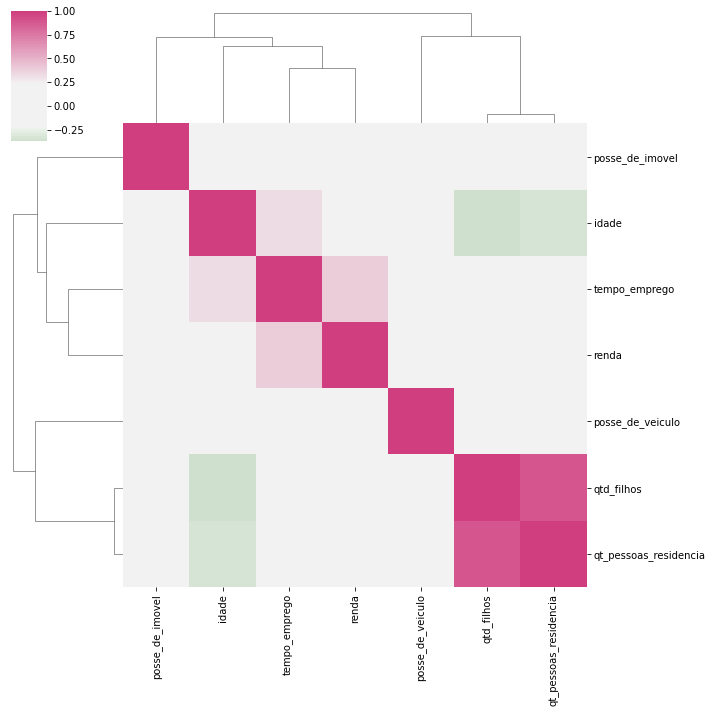

In [15]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df.corr(), figsize=(10, 10), center = 0, cmap=cmap)

In [ ]:
O tempo de emprego e a idade tem uma relação mediana com a renda, assim como a qtd de filhos e pessoas na residência.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

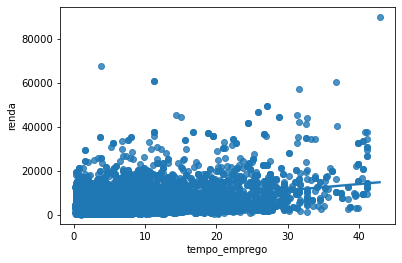

In [20]:
sns.regplot(x='tempo_emprego', y='renda', data = df)

# O gráfico não mostra fielmente se quanto maior o tempo de emprego, maior a renda.

3) Na su aopinião, há outliers na variável renda?

<AxesSubplot:xlabel='x', ylabel='y'>

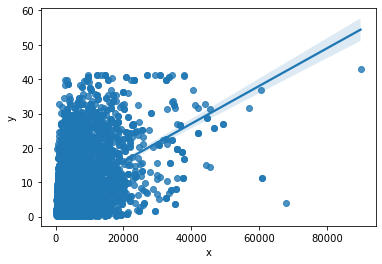

In [31]:
df_rank = df[['renda', 'tempo_emprego']]
df_rank = pd.concat([df_rank, df_rank.rank()], axis=1)
df_rank.columns = ['x', 'y', 'x_rank', 'y_rank']
df_rank.corr()
sns.regplot(x='x', y='y', data = df_rank)

#Não há outliers que causem preocupações na análise do gráfico. 

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<AxesSubplot:xlabel='tempo_emprego', ylabel='log_renda'>

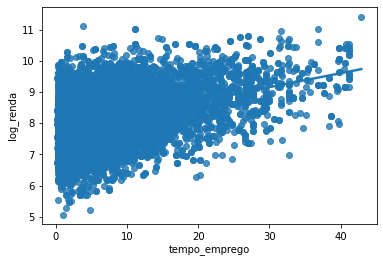

In [36]:
df['log_renda'] = np.log(df['renda'])
sns.regplot(x='tempo_emprego', y='log_renda', data = df)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
Melhorou. Podemos observar que é mais nítido que quanto maior o tempo de emprego mais longe o ponto fica do ponto central de Y.